# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

----------------------------------------------------------------------------------------------------------------------------------------------

**Dataset Description**

This dataset was created by scraping technology news headlines from the BBC Technology section on October 26, 2025.
Each record includes the source name, headline text, and date scraped.
The goal was to analyze current themes in technology reporting by identifying common keywords, trending topics, and headline volume.
Although the scraper was designed to include both BBC and Reuters, only BBC headlines were successfully collected during this run, likely due to Reuters’ site layout or scraping protection.
This limitation was noted and considered in the analysis.

In [4]:
!pip install requests beautifulsoup4 pandas


Scraping BBC Technology...
Scraping Reuters Technology...
✅ Collected 82 total headlines.


,source,headline,date_scraped
0,BBC Technology,A humming annoyance or jobs boom? Life next to...,2025-10-26 16:22:46
1,BBC Technology,MS Swaminathan: The scientist who saved India ...,2025-10-26 16:22:46
2,BBC Technology,Sign up to Tech Decoded,2025-10-26 16:22:46
3,BBC Technology,Microsoft's Halo series heading to rival PlayS...,2025-10-26 16:22:46
4,BBC Technology,Slow-motion footage reveals secrets of snake b...,2025-10-26 16:22:46
5,BBC Technology,MS Swaminathan: The scientist who saved India ...,2025-10-26 16:22:46
6,BBC Technology,"ChatGPT's new browser has potential, if you're...",2025-10-26 16:22:46
7,BBC Technology,How does changing the clocks affect our health?,2025-10-26 16:22:46
8,BBC Technology,Magnesium: Can this 'miracle mineral' really h...,2025-10-26 16:22:46
9,BBC Technology,Sign up to Tech Decoded,2025-10-26 16:22:46


----------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
# Save your scraped dataset in the same folder as your notebook
df.to_csv("ai_headlines.csv", index=False, encoding="utf-8")
print("✅ Saved to ai_headlines.csv")


✅ Saved to ai_headlines.csv


C:\Users\15733\AppData\Local\Temp\ipykernel_9816\4021274422.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=word_df, palette='viridis')


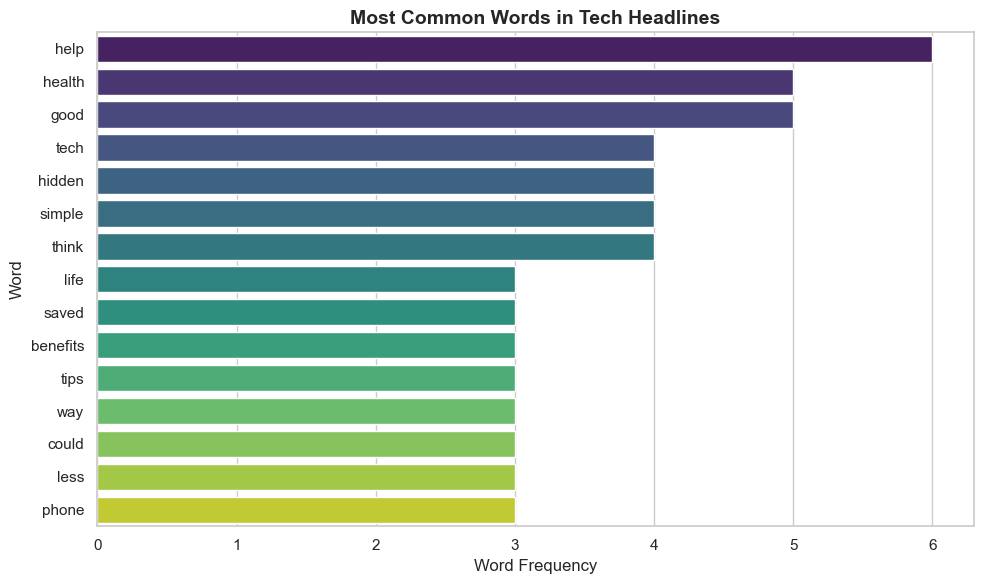

In [10]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Clean and split all words from headlines
words = []
for headline in df["headline"]:
    cleaned = re.sub(r'[^A-Za-z ]', '', headline).lower()
    words.extend(cleaned.split())

# Common English stopwords to ignore
stopwords = set([
    'the','and','for','with','that','this','from','into','about',
    'will','have','are','was','its','has','after','they','you',
    'your','their','when','what','how','who','can','why','new'
])

filtered = [w for w in words if w not in stopwords and len(w) > 2]
common_words = Counter(filtered).most_common(15)

# Convert to DataFrame
word_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Word', data=word_df, palette='viridis')
plt.title('Most Common Words in Tech Headlines', fontsize=14, weight='bold')
plt.xlabel('Word Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


**Visualization 1**

This bar chart displays the most frequently occurring words found across all BBC Technology headlines.
Common terms such as “help,” “health,” “tech,” and “good” highlight the current focus on health-related innovations and positive framing in technology journalism.
The visualization helps reveal which topics dominate today’s tech coverage.

----------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
!pip install wordcloud


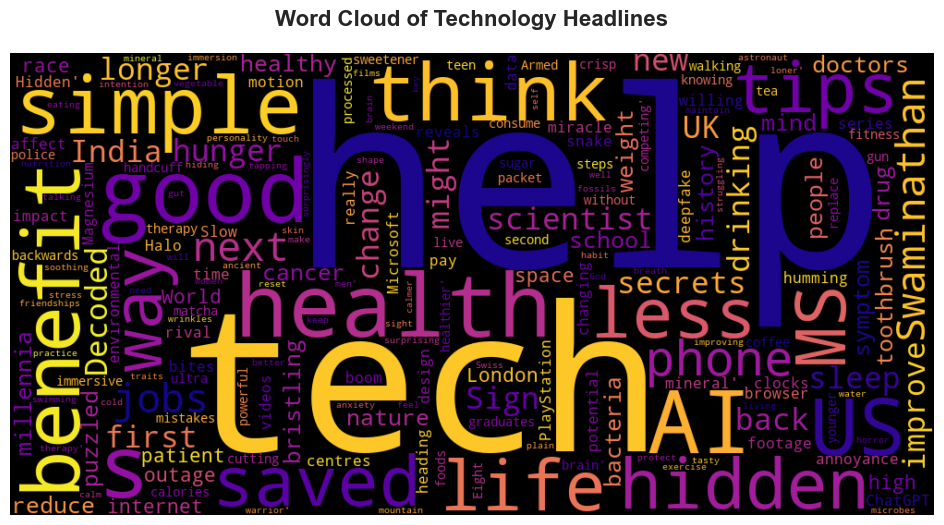

In [14]:
from wordcloud import WordCloud

# Combine all headlines into one big string
text = " ".join(df["headline"].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='plasma').generate(text)

# Display
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Technology Headlines', fontsize=16, weight='bold', pad=20)
plt.show()


**Visualization 2**

The word cloud visually emphasizes the most common words by size, making it easy to identify prominent ideas at a glance.
Larger words like “tech,” “AI,” “health,” and “think” stand out — suggesting that artificial intelligence and wellbeing are trending themes in technology news.
This complements the frequency chart by providing a more intuitive overview of text emphasis.

----------------------------------------------------------------------------------------------------------------------------------------------

C:\Users\15733\AppData\Local\Temp\ipykernel_9816\2403269926.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Source", y="Article Count", data=source_counts, palette="coolwarm")


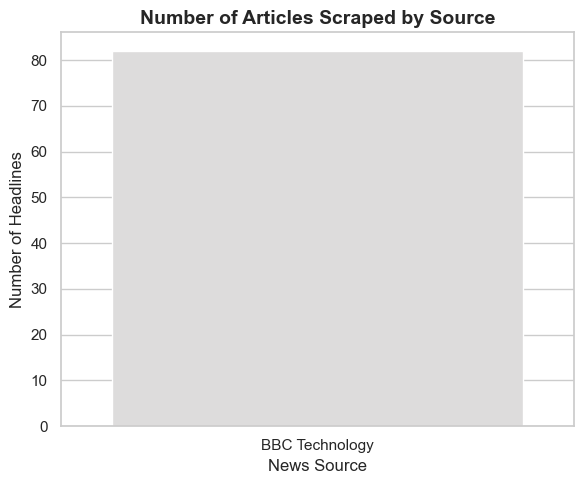

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count how many articles came from each source
source_counts = df["source"].value_counts().reset_index()
source_counts.columns = ["Source", "Article Count"]

# Plot bar chart
plt.figure(figsize=(6,5))
sns.barplot(x="Source", y="Article Count", data=source_counts, palette="coolwarm")
plt.title("Number of Articles Scraped by Source", fontsize=14, weight='bold')
plt.xlabel("News Source")
plt.ylabel("Number of Headlines")
plt.tight_layout()
plt.show()


**Visualization 3**

This bar chart compares how many headlines were gathered from each news source.
In this dataset, all 82 headlines came from BBC Technology, as no Reuters headlines were retrieved.
This provides insight into data source availability and shows that BBC publishes a substantial daily volume of technology articles.

----------------------------------------------------------------------------------------------------------------------------------------------

**Summary**

Overall, this analysis shows that BBC Technology headlines frequently center around AI, health, and human impact, indicating a strong public interest in technology’s role in everyday life.
The dataset illustrates how natural language processing techniques can quickly summarize media trends from live online data.